In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

# Import Data

In [2]:
lonely_pre = pd.read_csv('../../data/lonely_pre_features_tfidf_256.csv')
lonely_post = pd.read_csv('../../data/lonely_post_features_tfidf_256.csv')

In [3]:
lonely_pre.head(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,lonely,mord0r,2019/09/28,Having a bad day. I have been on a mania high ...,1.603538,3.727675,3.923206,84.883259,80.564885,6.931533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
1,lonely,d1ng_d0ngz,2019/09/28,looking for some chatting buddies might be a l...,0.490247,2.944179,1.603297,96.798846,90.730769,4.509890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,lonely,trynabhappie,2019/09/28,The flame is going out little by little! 😊 I o...,2.204922,3.805379,3.775515,89.124444,76.701149,7.197562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125035,0.0,0.073644


In [4]:
lonely_pre.tail(3)

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
11542,lonely,zengarden005,2019/03/01,27/F looking for a friend :/ Just lonely. Want...,0.920526,3.056820,2.399211,94.781974,83.210526,3.80000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11543,lonely,sttttttttto,2019/03/01,today someone told a joke... Soo I'm a pretty ...,3.299256,5.514785,4.693388,81.005537,75.446281,6.71405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
11544,lonely,gladiolus2,2019/03/01,informal online chat session on Spatial.Chat (...,2.575303,5.554833,2.154091,92.680303,86.727273,4.29697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287958,0.0


## Features

1. The published paper, from which the dataset is cited, has an in depth breakdown of the features which can be found here: [https://www.jmir.org/2020/10/e22635/](https://www.jmir.org/2020/10/e22635/).  

2. The question we are asking is:  How has the substance use increased over the pandemic?
  
- Feature of interest: `substance_use_total`
  
- In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

## High level analysis

The question we are asking is *How has the substance use increased over the pandemic?*. 
For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [5]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

lonely_pre = lonely_pre.loc[:, columns_of_interest]
lonely_post = lonely_post.loc[:, columns_of_interest]

In [6]:
lonely_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,lonely,mord0r,2019/09/28,Having a bad day. I have been on a mania high ...,0
1,lonely,d1ng_d0ngz,2019/09/28,looking for some chatting buddies might be a l...,0
2,lonely,trynabhappie,2019/09/28,The flame is going out little by little! 😊 I o...,0
3,lonely,Mutantti2,2019/09/28,Things wrong with my life I want to tell about...,1
4,lonely,LegalCelery,2019/09/28,I want to fall in love I dont really believe i...,0


In [7]:
lonely_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11545 entries, 0 to 11544
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            11545 non-null  object
 1   author               11545 non-null  object
 2   date                 11545 non-null  object
 3   post                 11545 non-null  object
 4   substance_use_total  11545 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 451.1+ KB


In [8]:
lonely_post.head(5)

,subreddit,author,date,post,substance_use_total
0,lonely,anonynok,2020/01/01,Feeling like shit. Anyone wanna play modern wa...,1
1,lonely,blahblahxbla,2020/01/01,Looking for men in their late twenties/thirtie...,0
2,lonely,wisqrg50,2020/01/01,i can't talk to anyone anyone else get invited...,0
3,lonely,drewyaboi,2020/01/01,Last year was exactly how I predicted it. At t...,0
4,lonely,motril91,2020/01/01,i want to flyy away! (i want to get away. yeah...,0


In [9]:
lonely_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            7955 non-null   object
 1   author               7955 non-null   object
 2   date                 7955 non-null   object
 3   post                 7955 non-null   object
 4   substance_use_total  7955 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 310.9+ KB


### Composition

> There are no missing values from the dataset.

In [10]:
print(f'Total number of records in the pre-pandemic dataset: {len(lonely_pre)}')
lonely_pre.describe()

Total number of records in the pre-pandemic dataset: 11545


,substance_use_total
count,11545.000000
mean,0.304981
std,0.741150
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,13.000000


In [11]:
print(f'Total number of records in the post-pandemic dataset: {len(lonely_post)}')
lonely_post.describe()

Total number of records in the post-pandemic dataset: 7955


,substance_use_total
count,7955.000000
mean,0.274670
std,0.690359
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,13.000000


Combining the pre and post into one dataset with a new feature column allows us to compare the data side by side

In [12]:
lonely_pre['period'] = 'pre'
lonely_post['period'] = 'post'

lonely_df = pd.concat([lonely_post, lonely_pre])
lonely_df

,subreddit,author,date,post,substance_use_total,period
0,lonely,anonynok,2020/01/01,Feeling like shit. Anyone wanna play modern wa...,1,post
1,lonely,blahblahxbla,2020/01/01,Looking for men in their late twenties/thirtie...,0,post
2,lonely,wisqrg50,2020/01/01,i can't talk to anyone anyone else get invited...,0,post
3,lonely,drewyaboi,2020/01/01,Last year was exactly how I predicted it. At t...,0,post
4,lonely,motril91,2020/01/01,i want to flyy away! (i want to get away. yeah...,0,post
...,...,...,...,...,...,...
11540,lonely,93462,2019/03/01,Different kind of loneliness I know a lot of p...,0,pre
11541,lonely,Endrazda,2019/03/01,"Advice for Meditation Hi everyone,\n\nLately I...",0,pre
11542,lonely,zengarden005,2019/03/01,27/F looking for a friend :/ Just lonely. Want...,0,pre
11543,lonely,sttttttttto,2019/03/01,today someone told a joke... Soo I'm a pretty ...,0,pre


### Visualization

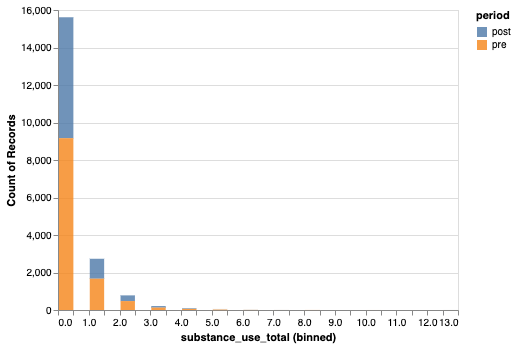

In [13]:
alt.Chart(lonely_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(lonely_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(lonely_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 11545
Number of unique authors (posters) in 'post' dataset: 7955


**From above figures, it can be summarized that:**

1. Each observation in each dataset is associated with a unique reddit user.
2. There are less unique authors posting in this subreddit post pandemic. It is likely because the `post` dataset covers a 4-month period while the `pre` data set covers a whole year period. 
3. The `substance_use_total` `post` pandemic is higher as shown in the plot. 